## Iterative Deepening Search (IDS) 

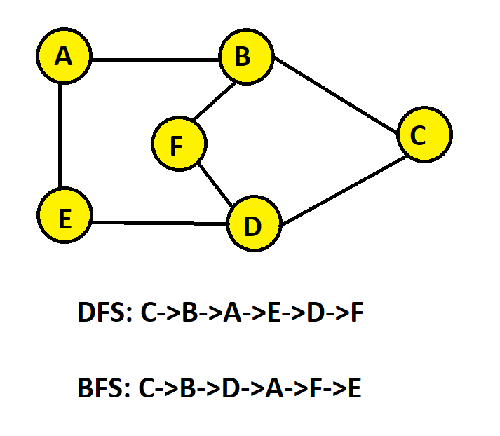

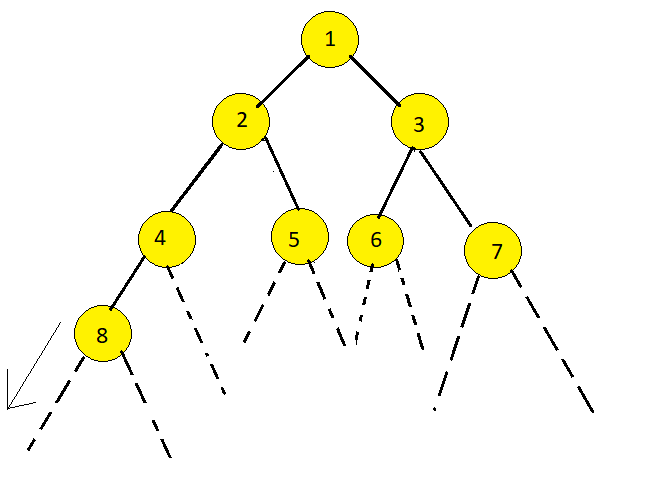

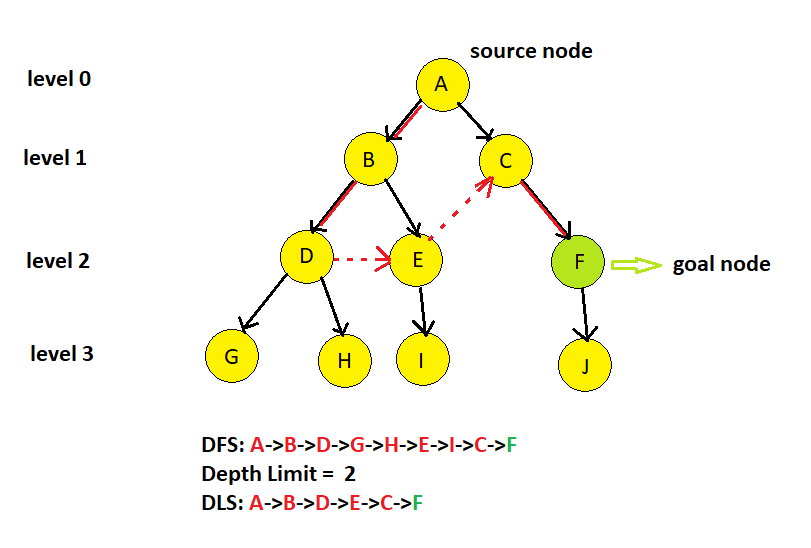

In [20]:
from collections import defaultdict


In [21]:
class Graph:

	def __init__(self,vertices):

		# No. of vertices
		self.V = vertices

		# default dictionary to store graph
		self.graph = defaultdict(list)

	# function to add an edge to graph
	def addEdge(self,u,v):
		self.graph[u].append(v)

	# A function to perform a Depth-Limited search
	# from given source 'src'
	def DLS(self,src,target,maxDepth):
		print("Arrow: ",src,"Depth: ",maxDepth)
		if src == target : return True

		# If reached the maximum depth, stop recursing.
		if maxDepth <= 0 : return False

		# Recur for all the vertices adjacent to this vertex
		for i in self.graph[src]:
				if(self.DLS(i,target,maxDepth-1)):
					return True
		return False

	# IDDFS to search if target is reachable from v.
	# It uses recursive DLS()
	def IDDFS(self,src, target, maxDepth):

		# Repeatedly depth-limit search till the
		# maximum depth
		for i in range(maxDepth):
			if (self.DLS(src, target, i)):
				return True
		return False


In [23]:
# Create a graph given in the above diagram
g = Graph (7);
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 3)
g.addEdge(1, 4)
g.addEdge(2, 5)
g.addEdge(2, 6)

target = 6; maxDepth = 3; src = 0

if g.IDDFS(src, target, maxDepth) == True:
	print ("Target is reachable from source " +
		"within max depth")
else :
	print ("Target is NOT reachable from source " +
		"within max depth")

# This code is contributed by Neelam Pandey


Arrow:  0 Depth:  0
Arrow:  0 Depth:  1
Arrow:  1 Depth:  0
Arrow:  2 Depth:  0
Arrow:  0 Depth:  2
Arrow:  1 Depth:  1
Arrow:  3 Depth:  0
Arrow:  4 Depth:  0
Arrow:  2 Depth:  1
Arrow:  5 Depth:  0
Arrow:  6 Depth:  0
Target is reachable from source within max depth


## Unifprm Cost Search (UCS)

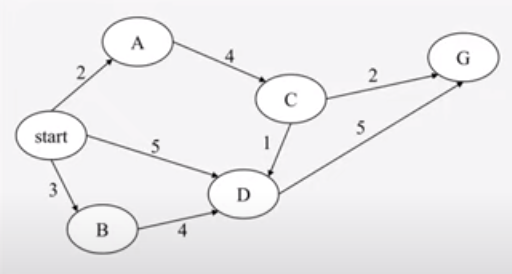

In [15]:
graph = {
    'S' : [('A', 2) , ('B' , 3) , ('D' , 5)], 
    'A' : [('C' , 4)], 
    'B' : [('D' , 4)], 
    'C' : [('D' , 1), ('G' , 2)], 
    'D' : [('G' , 5)], 
    'G' : []
}


In [16]:
def pathCost (path) : 
    totalCost = 0 
    for(node , cost) in path:
        totalCost += cost 
    return totalCost  , path[-1][0]

In [24]:
def ucs(graph , start , goal):
    visited = []
    queue = [[(start, 0)]]
    while queue:
        queue.sort(key=pathCost)# sorting by cost
        path = queue.pop(0) # choosing least cost
        node = path[-1][0]
        if node in visited : 
            continue
        visited.append(node)
        if node == goal: 
            return path 
        else: 
            adjacentNodes = graph.get(node , [])
            for (node2 , cost)in adjacentNodes: 
                newPath = path.copy()
                newPath.append((node2 , cost))
                queue.append(newPath)


In [25]:
solution = ucs(graph , 'S' , 'G')
print('solution is ', solution)
print('cost of solution is ' , pathCost(solution)[0])

solution is  [('S', 0), ('A', 2), ('C', 4), ('G', 2)]
cost of solution is  8
